<a href="https://colab.research.google.com/github/gimelato/curso-data-girls/blob/main/mortalidade_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto para o desafio do evento (re)Start Data Science - Data Girls

Escolhi trabalhar com [esta](https://www.kaggle.com/johnharshith/world-happiness-report-2021-worldwide-mortality) base de dados do Kaggle


In [ ]:
# Importando os pacotes que irei utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregando os dados

covid = pd.read_csv("/content/drive/MyDrive/data_girls/desafio_final/WHRData2021.csv")

Primeiro vou ver a tabela, que variáveis tem e como estão apresentadas

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 17 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 166 non-null    object 
 1   Population 2020                                                              164 non-null    float64
 2   Population 2019                                                              164 non-null    float64
 3   COVID-19 deaths per 100,000 population in 2020                               163 non-null    float64
 4   Median age                                                                   163 non-null    float64
 5   Island                                                                       166 non-null    int64  
 6   Index of exposure to COVID-19  infections 

In [ ]:
covid.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.22
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,NaN,NaN,NaN,NaN,NaN


Agora vou começar a tratar esses dados

In [ ]:
# Selecionando colunas de interesse

covid.drop(['All-cause death count, 2017', 'All-cause death count, 2018', 'All-cause death count, 2019', 'All-cause death count, 2020', 'Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average'], axis='columns', inplace = True)

In [ ]:
covid.head(10)

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.510
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.560
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.550
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.830
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.900
5,Jordan,10203140.0,10101694.0,37.577,23.2,0,1.895,8.961,0,0,0.465,33.100
6,Syria,17500657.0,17070135.0,4.063,21.7,0,1.814,8.951,0,0,0.319,34.200
7,Turkey,84339067.0,83429615.0,24.758,31.6,0,2.067,8.952,0,0,0.295,40.550
8,Pakistan,220892331.0,216565318.0,4.607,23.5,0,1.048,8.577,0,0,0.277,33.450
9,Indonesia,273523621.0,270625568.0,8.094,29.3,1,0.576,8.578,0,0,0.561,37.478


Descrevendo as colunas selecionadas

*   País
*   População em 2020
*   População em 2019
*   Mortes por covid a cada 100.000 pessoas em 2020
*   Idade média da população
*   O país é uma ilha?
*   Índice de exposição ao covid em outros países a partir de 31 de março
*   Distância em log aos países endêmicos de SARS
*   Se o país pertence à região pacífica ocidental da OMS
*   Se o país tem uma mulher como governante
*   Índice de confiança da população no governo (quanto maior o índice maior a confiança)
*   Coeficiente Gini de renda (quanto menor o valor mais igualitária a distribuição de renda no país)














In [ ]:
# renomeando as colunas para ficar mais fácil de trabalhar

covid.rename(columns={'Country name':'pais','Population 2020': 'pop_2020', 'Population 2019':'pop_2019','COVID-19 deaths per 100,000 population in 2020':'mortes',
                      'Median age':'idade', 'Island':'ilha', 'Index of exposure to COVID-19  infections in other countries as of March 31':'exp_covid',
                      'Log of average distance to SARS countries':'dist_sars', 'WHO Western Pacific Region':'pacifico_ocidental',
                      'Female head of government':'mulher', 'Index of institutional trust':'confianca_inst', 'Gini coefficient of income':'gini'}, inplace = True)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pais                166 non-null    object 
 1   pop_2020            164 non-null    float64
 2   pop_2019            164 non-null    float64
 3   mortes              163 non-null    float64
 4   idade               163 non-null    float64
 5   ilha                166 non-null    int64  
 6   exp_covid           164 non-null    float64
 7   dist_sars           164 non-null    float64
 8   pacifico_ocidental  166 non-null    int64  
 9   mulher              166 non-null    int64  
 10  confianca_inst      165 non-null    float64
 11  gini                164 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 15.7+ KB


In [ ]:
# Transformando as colunas de 0 e 1 em booleano
covid['ilha'] = covid['ilha'].astype('bool')
covid['pacifico_ocidental'] = covid['pacifico_ocidental'].astype('bool')
covid['mulher'] = covid['mulher'].astype('bool')


In [ ]:
# Procurando valores faltantes
covid.isnull().sum()

pais                  0
pop_2020              2
pop_2019              2
mortes                3
idade                 3
ilha                  0
exp_covid             2
dist_sars             2
pacifico_ocidental    0
mulher                0
confianca_inst        1
gini                  2
dtype: int64

In [ ]:
#Procurando os países com valores nulos
covid.query("mortes == 'NaN'")

#Esses 3 países têm todos os valores nulos da tabela.
#Escolho retirar eles para não influenciarem nas análises, principalmente pela falta de número de mortes

,pais,pop_2020,pop_2019,mortes,idade,ilha,exp_covid,dist_sars,pacifico_ocidental,mulher,confianca_inst,gini
157,Turkmenistan,5942089.0,5942089.0,NaN,NaN,False,1.463,8.735,False,False,0.511,26.5
163,Somaliland region,NaN,NaN,NaN,NaN,False,NaN,NaN,False,False,NaN,NaN
164,North Cyprus,NaN,NaN,NaN,NaN,False,NaN,NaN,False,False,0.305,NaN


In [ ]:
# removendo as linhas que têm valores nulos
covid.dropna(inplace=True)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 165
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pais                163 non-null    object 
 1   pop_2020            163 non-null    float64
 2   pop_2019            163 non-null    float64
 3   mortes              163 non-null    float64
 4   idade               163 non-null    float64
 5   ilha                163 non-null    bool   
 6   exp_covid           163 non-null    float64
 7   dist_sars           163 non-null    float64
 8   pacifico_ocidental  163 non-null    bool   
 9   mulher              163 non-null    bool   
 10  confianca_inst      163 non-null    float64
 11  gini                163 non-null    float64
dtypes: bool(3), float64(8), object(1)
memory usage: 13.2+ KB


In [ ]:
# mudando o index das linhas para ficar contínuo
covid.index = list(range(163))


Agora vou fazer uma breve análise estatística de como meus dados estão distribuídos

In [ ]:
# vendo a estatística geral dos dados
covid.describe()

,pop_2020,pop_2019,mortes,idade,exp_covid,dist_sars,confianca_inst,gini
count,1.630000e+02,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,4.743424e+07,4.671117e+07,30.704018,30.667485,1.675810,9.057534,0.315724,37.956356
std,1.603294e+08,1.572632e+08,38.194215,9.332182,1.304417,0.376623,0.173426,8.277320
min,3.412500e+05,3.613130e+05,0.000000,15.100000,0.379000,8.044000,0.046000,23.200000
25%,4.825998e+06,4.715246e+06,1.680500,21.850000,0.818500,8.929500,0.187500,32.325000
50%,1.132662e+07,1.126308e+07,10.125000,29.700000,1.076000,9.070000,0.286000,37.343000
75%,3.414153e+07,3.392459e+07,46.802500,39.350000,2.237500,9.311000,0.413000,43.850000
max,1.439324e+09,1.397715e+09,168.496000,48.200000,6.343000,9.726000,0.906000,65.426000


Nestes dados meu interesse de comparação é o desempenho de um país frente à pandemia, então quero ver como as variáveis se relacionam principalmente com o número de mortes e depois com a exposição ao covid em outros países. Olhando para a discrepância entre a média e a mediana (50%) do número de mortes, me parece que a distribuição é não paramétrica. Analisando a distribuição da exposição ao covid e também comparando os valores de média e mediana, também me parece não ser paramétrica. Ou seja, não posso considerar normalidade dos dados quando for compará-los estatisticamente.

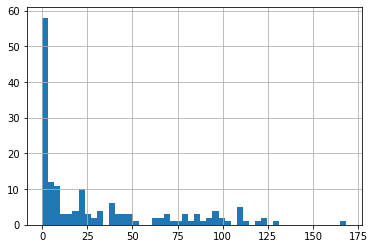

In [ ]:
# Fiz um histograma para ver como o número de mortes está distribuído. A curva apresenta uma assimetria positiva
covid['mortes'].hist(bins=50);

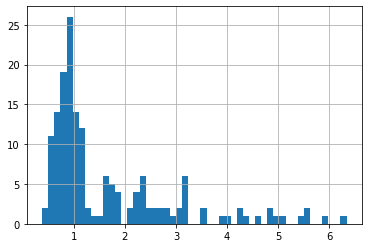

In [ ]:
# Olhando para a curva da exposição. A curva também apresenta uma assimetria positiva
covid['exp_covid'].hist(bins=50);

In [ ]:
#calculando as medianas de mortes e exposição ao covid agrupadamente para ilha

covid.groupby('ilha')[['mortes', 'exp_covid']].median()

,mortes,exp_covid
ilha,,
False,17.263,1.0770
True,8.265,0.9745


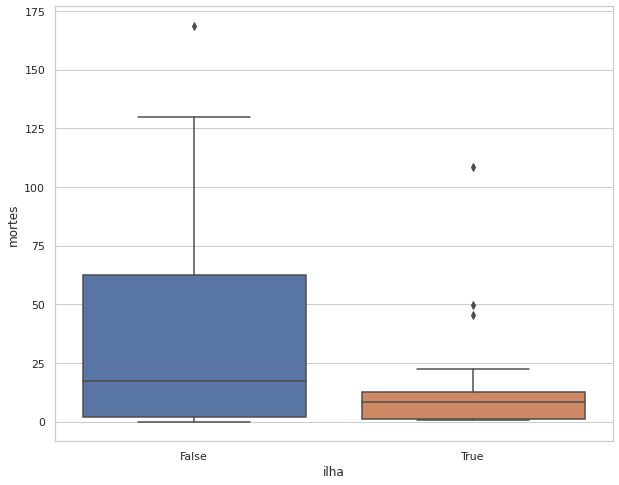

In [ ]:
# boxplot comparando as distribuições do número de mortes entre os países que são ilha e os que não são

plt.figure(figsize = (10,8))
sns.boxplot(x = 'ilha', y = 'mortes', data = covid);

In [ ]:
pip install statannot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

False v.s. True: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


(<matplotlib.axes._subplots.AxesSubplot at 0x7f8f5d5a39d0>,
 [<statannot.StatResult.StatResult at 0x7f8f5d61b110>])

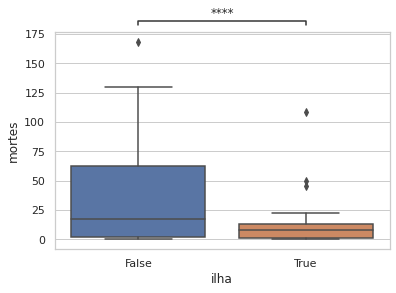

In [ ]:
# Eu tentei associar ao gráfico um teste estatístico para comparar as duas distribuições. Aí tive um problema que não consegui resolver:
# meu p valor deu absurdamente baixo e não acho que seja o caso da minha amostra. Não confio nesse valor e não entendi porque deu errado

from statannot import add_stat_annotation

sns.set(style="whitegrid")

x = "ilha"
y = "mortes"
order = ['False', 'True']
ax = sns.boxplot(data=covid, x=x, y=y, order=None)
add_stat_annotation(ax, data=covid, x=x, y=y, order=order,
                    box_pairs=[('False', 'True')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
#fiz o teste separadamente do gráfico e novamente meu p valor deu tão baixo que acredito estar errado e continuo sem saber explicar o porquê

mannwhitneyu(covid['ilha'], covid['mortes'])

MannwhitneyuResult(statistic=915.5, pvalue=1.550456294256393e-52)

In [ ]:
#  Não sei se o problema é o tamanho discrepante entre as duas distribuições, são apenas 22 países que são ilha
covid[covid['ilha']].count()

pais                  22
pop_2020              22
pop_2019              22
mortes                22
idade                 22
ilha                  22
exp_covid             22
dist_sars             22
pacifico_ocidental    22
mulher                22
confianca_inst        22
gini                  22
dtype: int64

De qualquer forma, olhando para as medianas e os boxplots, as duas distribuições parecem diferir entre si com as ilhas apresentando menor número de mortes

In [ ]:
#calculando as medianas de mortes e exposição ao covid agrupadamente para governantes mulheres

covid.groupby('mulher')[['mortes', 'exp_covid']].median()

,mortes,exp_covid
mulher,,
False,12.182,1.076
True,8.498,1.649


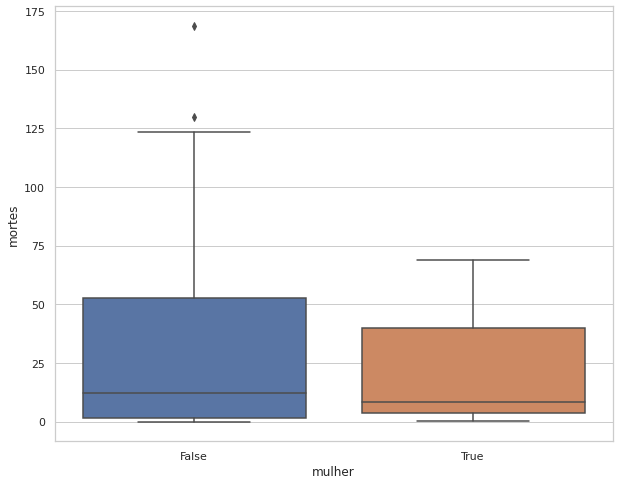

In [ ]:
# boxplot comparando as distribuições do número de mortes entre os países que são governados por mulheres e os que não são

plt.figure(figsize = (10,8))
sns.boxplot(x = 'mulher', y = 'mortes', data = covid);

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

False v.s. True: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


(<matplotlib.axes._subplots.AxesSubplot at 0x7f8f544f5dd0>,
 [<statannot.StatResult.StatResult at 0x7f8f544c1190>])

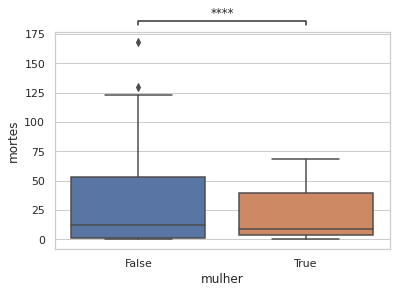

In [ ]:
# Novamente me deparei com o problema do p valor absurdamente baixo que acredito ser um erro mas não consigo dizer qual

sns.set(style="whitegrid")

x = "mulher"
y = "mortes"
order = ['False', 'True']
ax = sns.boxplot(data=covid, x=x, y=y, order=None)
add_stat_annotation(ax, data=covid, x=x, y=y, order=order,
                    box_pairs=[('False', 'True')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


In [ ]:
# e com um teste estatístico separado do gráfico sigo com o mesmo problema.

mannwhitneyu(covid['mulher'], covid['mortes'])

MannwhitneyuResult(statistic=946.0, pvalue=3.4222696022115106e-52)

In [ ]:
# olhando a quantidade de países que têm mulheres como principais governantes
covid[covid['mulher']].count()

pais                  23
pop_2020              23
pop_2019              23
mortes                23
idade                 23
ilha                  23
exp_covid             23
dist_sars             23
pacifico_ocidental    23
mulher                23
confianca_inst        23
gini                  23
dtype: int64

Apesar das medianas das duas distribuições parecerem diferentes, os boxplots não parecem tão diferentes e olhando para eles as medianas parecem muito próximas.

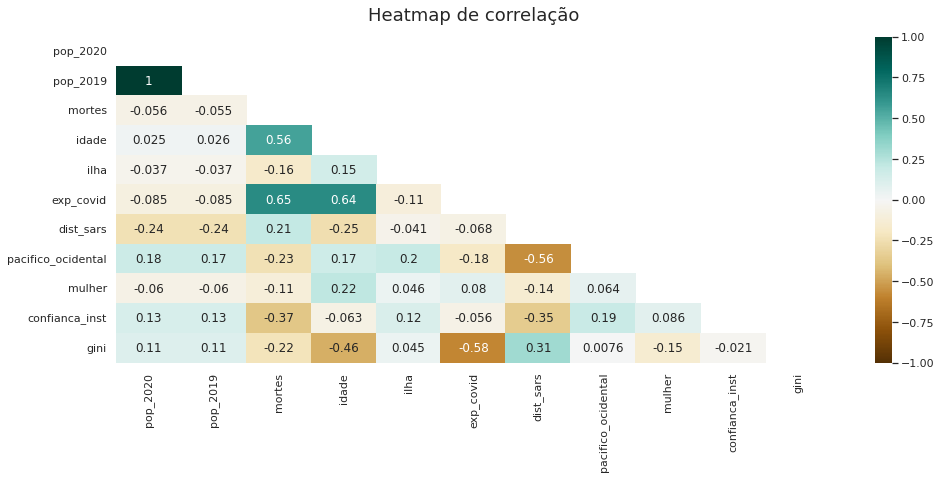

In [ ]:
# Fazendo um heatmap de correlação
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(covid.corr(), dtype=np.bool)) #essa variável vai fazer com que seja mostrada só a metade inferior da matriz de correlação
heatmap = sns.heatmap(covid.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap de correlação', fontdict={'fontsize':18}, pad=16);

Há uma correlação moderada positiva entre idade e mortes, idade e exposição ao covid em outros países e exposição e morte, conforme esperado. Quanto mais velha a população maior o grupo de risco e quanto maior a exposição, mais doentes e mais mortos.

Me chama a atenção a correlação moderada negativa do índice gini com a exposição ao covid, pois quanto menor o índice gini (maior igualdade de distribuição de renda), maior a exposição.


## Será que consigo prever o desempenho de um país na pandemia?

Primeiramente preciso criar a classificação de desempenho de cada país, criando assim uma variável discreta para classificar meus grupos de interesse

In [ ]:
# selecionando as variáveis que quero utilizar para classificar o desempenho dos países

covid_var = covid[['mortes', 'exp_covid']]

In [ ]:
# normalizando os dados para seleção de clusters

covid_scaler = covid_var.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [ ]:
# head da tabela com as distribuições normalizadas

covid_scaler.head()

,mortes,exp_covid
0,1.930842,0.009345
1,-0.608653,-0.037419
2,-0.279833,0.506119
3,-0.240770,0.164970
4,-0.335889,-0.326437


In [ ]:
# conferindo se os dados foram normalizados
covid_scaler.mean().round()

mortes      -0.0
exp_covid    0.0
dtype: float64

In [ ]:
# conferindo se os dados foram normalizados
covid_scaler.std()

mortes       1.0
exp_covid    1.0
dtype: float64

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

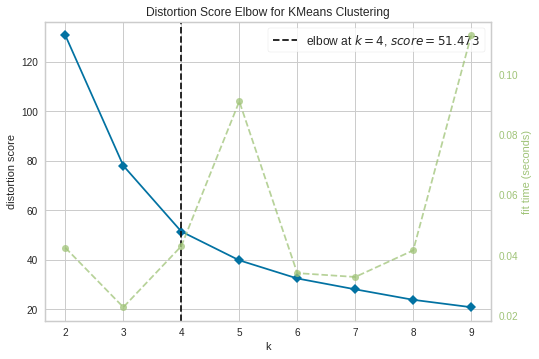

In [ ]:
# vendo qual a quantidade ideal de clusters para dividir a minha amostra

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(covid_scaler)    
visualizer.show()  

In [ ]:
# classificando meus dados em 4 amostras diferentes

kmeans = KMeans(n_clusters=4, random_state=12012021).fit(covid_scaler)

In [ ]:
# adicionando na minha tabela a classificação de cada país

covid['desempenho'] = kmeans.labels_

In [ ]:
covid.head()

,pais,pop_2020,pop_2019,mortes,idade,ilha,exp_covid,dist_sars,pacifico_ocidental,mulher,confianca_inst,gini,desempenho
0,United States,331002647.0,328239523.0,104.451,38.3,False,1.688,9.315,False,False,0.250,47.51,2
1,Egypt,102334403.0,100388073.0,7.457,25.3,False,1.627,9.007,False,False,0.446,31.56,1
2,Morocco,36910558.0,36471769.0,20.016,29.6,False,2.336,9.226,False,False,0.397,39.55,3
3,Lebanon,6825442.0,6855713.0,21.508,31.1,False,1.891,8.956,False,False,0.107,31.83,3
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,False,1.250,8.897,False,False,0.651,45.90,1


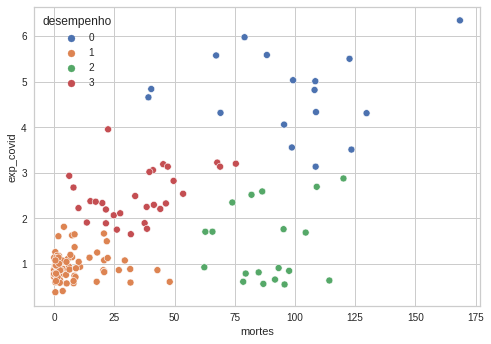

In [ ]:
# olhando para minhas variáveis classificadoras segundo a classificação para ver que tipo de grupos foram criados 

sns.scatterplot(data=covid, x="mortes", y="exp_covid", hue= 'desempenho',  palette="deep")

In [ ]:
# olhando quantos países caíram em cada classificação

covid.groupby(['desempenho']).size().to_frame('count').sort_values('count', ascending=False)

,count
desempenho,
1,97
3,30
2,19
0,17


In [ ]:
# adicionando uma etiqueta para cada cluster definido. Considerei ótimo os países com números baixos tanto de morte quanto de exposição,
# bom os que tiveram número baixo de mortes mas alta exposição, ruim os que tiveram baixa exposição mas muita morte e 
# péssimo os que tiveram alta exposição e muita morte

dict_cluster = {0:'péssimo',
1:'ótimo',
2:'ruim',
3:'bom'}

covid['cluster'] = covid['desempenho'].map(dict_cluster)

In [ ]:
covid.head()

,pais,pop_2020,pop_2019,mortes,idade,ilha,exp_covid,dist_sars,pacifico_ocidental,mulher,confianca_inst,gini,desempenho,cluster
0,United States,331002647.0,328239523.0,104.451,38.3,False,1.688,9.315,False,False,0.250,47.51,2,ruim
1,Egypt,102334403.0,100388073.0,7.457,25.3,False,1.627,9.007,False,False,0.446,31.56,1,ótimo
2,Morocco,36910558.0,36471769.0,20.016,29.6,False,2.336,9.226,False,False,0.397,39.55,3,bom
3,Lebanon,6825442.0,6855713.0,21.508,31.1,False,1.891,8.956,False,False,0.107,31.83,3,bom
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,False,1.250,8.897,False,False,0.651,45.90,1,ótimo


In [ ]:
# olhando para os valores das medianas das variáveis numéricas para cada um dos meus grupos definidos

covid[['pop_2020', 'pop_2020', 'mortes', 'idade', 'exp_covid', 
                   'dist_sars', 'confianca_inst', 'gini', 'cluster']].groupby(['cluster']).median()

,pop_2020,pop_2020,mortes,idade,exp_covid,dist_sars,confianca_inst,gini
cluster,,,,,,,,
bom,7763414.0,7763414.0,35.6215,39.15,2.3505,8.9765,0.255,31.215
péssimo,9660350.0,9660350.0,99.2120,43.20,4.8170,9.0450,0.253,29.700
ruim,17643060.0,17643060.0,86.8790,33.50,0.9260,9.4340,0.115,43.800
ótimo,14862927.0,14862927.0,2.0700,25.00,0.8910,9.1530,0.323,39.700


In [ ]:
# fiquei curiosa para saber qual é aquele pontinho deslocado com péssimo desempenho. O maior outlier desses dados

covid['mortes'].max()

168.49599999999998

In [ ]:
# é a Bélgica!!!

covid.query("mortes == 168.49599999999998")

,pais,pop_2020,pop_2019,mortes,idade,ilha,exp_covid,dist_sars,pacifico_ocidental,mulher,confianca_inst,gini,desempenho,cluster
15,Belgium,11589616.0,11484055.0,168.496,41.8,False,6.343,9.071,False,False,0.303,25.6,0,péssimo


In [ ]:
#Olhando para quais países caíram na classificação de péssimo desempenho

covid.query("cluster == 'péssimo'")

,pais,pop_2020,pop_2019,mortes,idade,ilha,exp_covid,dist_sars,pacifico_ocidental,mulher,confianca_inst,gini,desempenho,cluster
11,United Kingdom,67886004.0,66834405.0,108.450,40.8,True,5.009,9.087,False,False,0.268,34.07,0,péssimo
12,France,65273512.0,67059887.0,99.212,42.0,False,5.031,9.092,False,False,0.234,29.30,0,péssimo
13,Germany,83783945.0,83132799.0,40.331,46.6,False,4.838,9.018,False,True,0.435,31.10,0,péssimo
14,Netherlands,17134873.0,17332850.0,67.260,43.2,False,5.574,9.060,False,False,0.522,27.00,0,péssimo
15,Belgium,11589616.0,11484055.0,168.496,41.8,False,6.343,9.071,False,False,0.303,25.60,0,péssimo
16,Spain,46754783.0,47076781.0,108.731,45.5,False,4.332,9.172,False,False,0.143,33.20,0,péssimo
17,Italy,60461828.0,60297396.0,122.654,47.9,False,5.501,9.078,False,False,0.076,33.40,0,péssimo
19,Hungary,9660350.0,9769949.0,98.723,43.4,False,3.555,9.011,False,False,0.253,28.70,0,péssimo
20,Czech Republic,10708982.0,10669709.0,108.133,43.3,False,4.817,9.025,False,False,0.290,24.00,0,péssimo
84,Austria,9006400.0,8877067.0,69.084,44.4,False,4.315,9.023,False,False,0.358,26.80,0,péssimo


In [ ]:
#Eu usei essa linha para ficar vendo alguns paises específicos

covid.query("pais == 'India'")

,pais,pop_2020,pop_2019,mortes,idade,ilha,exp_covid,dist_sars,pacifico_ocidental,mulher,confianca_inst,gini,desempenho,cluster
30,India,1.380004e+09,1.366418e+09,10.778,28.2,False,0.937,8.532,False,False,0.526,39.334,1,ótimo


In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Antes de tentar ver se é possível a máquina predizer o comportamento de um país, quero ver quais são as minhas variáveis de maior influência para utilizá-las no aprendizado

In [ ]:
# excluindo as colunas que não irei utilizar nessa análise

dataframe = covid.drop(["pais","mortes","exp_covid","cluster"], axis = "columns")
dataframe.head(5)

,pop_2020,pop_2019,idade,ilha,dist_sars,pacifico_ocidental,mulher,confianca_inst,gini,desempenho
0,331002647.0,328239523.0,38.3,False,9.315,False,False,0.250,47.51,2
1,102334403.0,100388073.0,25.3,False,9.007,False,False,0.446,31.56,1
2,36910558.0,36471769.0,29.6,False,9.226,False,False,0.397,39.55,3
3,6825442.0,6855713.0,31.1,False,8.956,False,False,0.107,31.83,3
4,34813867.0,34268528.0,31.9,False,8.897,False,False,0.651,45.90,1


In [ ]:
# Separando as variáveis do classificador
array = dataframe.values
X = array[:,:9]
Y = array[:,-1]

In [ ]:
# escolhi saber quais são as duas variáveis mais relevantes

X_new = SelectKBest(f_classif, k=2).fit(X, Y)

In [ ]:
cols = X_new.get_support(indices=1)
feature = dataframe.columns[cols].tolist()
feature

# as variáveis encontradas foram idade e o índice gini, que são as variáveis que na minha matriz tiveram correlação com as mortes e/ou com a exposição

['idade', 'gini']

Preparando a amostra para aplicar numa metodologia de aprendizado

In [ ]:
# Separando as variáveis que irei utilizar para tentar predizer o desempenho

data = dataframe[["idade","gini","desempenho"]]
data

,idade,gini,desempenho
0,38.3,47.51,2
1,25.3,31.56,1
2,29.6,39.55,3
3,31.1,31.83,3
4,31.9,45.90,1
...,...,...,...
158,35.6,39.25,1
159,28.2,39.70,1
160,20.3,36.71,1
161,35.0,29.01,3


In [ ]:
# separando o etiquetador
data_x = data.drop('desempenho', axis=1)
data_y = data['desempenho']

In [ ]:
# dividindo meus dados em grupo de treinamento e teste. Separei 70% para treinamento e 30% para teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=9765, stratify=data_y)

In [ ]:
# Como meus grupos tem quantidades de países dentro de cada um muito discrepantes entre si, tenho que balancear minhas amostras
# Para isso vou usar a função smote que faz um oversampling das amostras pequenas gerando artificialmente novos valores
#(como minha base já está pequena fazer um undersampling reduziria demais a quantidade de valores para um machine learning)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=6754)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Tudo pronto, hora do aprendizado

In [ ]:
# aplicando uma árvore de decisão

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [ ]:
# fazendo o teste do aprendizado

y_pred = classifier.predict(X_test)

Avaliação do aprendizado

In [ ]:
# matriz de confusão e métricas associadas para avaliação

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3  0  0  2]
 [ 0 22  4  3]
 [ 1  4  0  1]
 [ 2  3  2  2]]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.76      0.76      0.76        29
           2       0.00      0.00      0.00         6
           3       0.25      0.22      0.24         9

    accuracy                           0.55        49
   macro avg       0.38      0.40      0.38        49
weighted avg       0.55      0.55      0.55        49



In [ ]:
# lembrando dos labels
dict_cluster

{0: 'péssimo', 1: 'ótimo', 2: 'ruim', 3: 'bom'}

Confusion matrix:
 [[ 3  0  0  2]
 [ 0 22  4  3]
 [ 1  4  0  1]
 [ 2  3  2  2]]


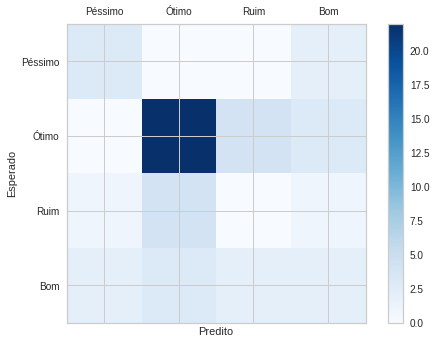

In [ ]:
# fazendo um gráfico da matriz de confusão

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Péssimo', 'Ótimo', 'Ruim', 'Bom']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predito')
plt.ylabel('Esperado')
plt.show()

Meu modelo teve bom desempenho para predizer os países com classificação ótimo, no entanto não serviu para as outras classificações. Talvez seja melhor mudar o método de balanceamento da amostra ou seleção de outro tipo de aprendizado.

Explorando toda a base muitas coisas me chamaram atenção e senti falta de outras variáveis como medida, como por exemplo o PIB de cada país.

Quanto à maioria dos países com desemprenho classificado como péssimo serem europeus penso que seja também um problema de disponibilidade de dados. É sabido que esses países sempre tiveram maior número de testes disponíveis, então tiveram melhor monitoramento da pandemia. A Índia por exemplo está com classificação ótima, mas os valores de 2021 não estão inclusos e foi quando a Índia teve uma grande crise de covid.

O índice gini foi uma variável classificada como relevante, no entanto muitos países com maior igualdade de distribuição de renda são países muito pobres. Igualdade de distribuição de renda não significa riqueza.

Muitas coisas ainda podem ser exploradas nessa base e de diferentes formas.